In [1]:
import numpy as np
from matplotlib import pyplot as plt

from molecular import rayleigh_scattering, refractive_index, molecular_properties, utilities, rayleigh_depol, constants
from matplotlib import pyplot as plot
reload(constants); reload(rayleigh_scattering); reload(refractive_index)
reload(molecular_properties); reload(utilities);  reload(rayleigh_depol)

<module 'molecular.rayleigh_depol' from '/media/sf_Work/Work/Programming/modules/molecular/molecular/rayleigh_depol.pyc'>

Trying to reproduce values in Reyliegh_calculations_Ulla.pdf

In [2]:
Ps = 1013.25
Ts = 288.15
RH = 0.
C = 385. # CO2 ppmv

wavelengths = [354.7, 386.7, 407.5]
rayleigh_scattering.ASSUME_AIR_IDEAL = True

for wavelength in wavelengths:
    n_air = refractive_index.n_air(wavelength, Ps, Ts, C, RH)
    Fk = molecular_properties.kings_factor_atmosphere(wavelength, C, p_e=0., p_t=Ps)
    epsilon = molecular_properties.epsilon_atmosphere(wavelength, C, p_e=0., p_t=Ps)
    alpha = rayleigh_scattering.alpha_rayleigh(wavelength, Ps, Ts, C, RH)
    print "%s nm: %1.4f  %1.6f  %1.6f  %1.5f" % (wavelength, (n_air-1)*10**6, Fk, epsilon, alpha * 10**5 )

354.7 nm: 285.7259  1.052903  0.238061  7.05123
386.7 nm: 283.5079  1.051665  0.232492  4.90833
407.5 nm: 282.3606  1.051051  0.229728  3.94588


In [3]:
# Evaluate Tomasi 2005, table 2.
Ps = 1013.00
Ts = 288.20
RH = 45.9
C = 385. # CO2 ppmv
p_e = utilities.rh_to_pressure(RH, Ts)
ef = refractive_index.enhancement_factor_f(Ps, Ts)

print("p_e: %.5f hPa. Should be 7.85075." % p_e)
print("f: %1.5f" % ef)

wavelengths = [200., 300., 3500.]
rayleigh_scattering.ASSUME_AIR_IDEAL = True

for wavelength in wavelengths:
    Fk = molecular_properties.kings_factor_atmosphere(wavelength, C, p_e=p_e, p_t=Ps)
    epsilon = molecular_properties.epsilon_atmosphere(wavelength, C, p_e=p_e, p_t=Ps)
    alpha = rayleigh_scattering.alpha_rayleigh(wavelength, Ps, Ts, C, RH)
    print "%s nm: %1.6f  %1.5f  %1.5f" % (wavelength, Fk, epsilon, alpha * 10**5 )

p_e: 7.85427 hPa. Should be 7.85075.
f: 1.00393
200.0 nm: 1.078508  0.35329  91.69857
300.0 nm: 1.056005  0.25202  14.35820
3500.0 nm: 1.046405  0.20882  0.00067


In [4]:
# Evaluate Tomasi 2005, table 2.
Ps = 1013.0
Ts = 288.20
RH = 45.9
C = 385. # CO2 ppmv

rayleigh_scattering.ASSUME_AIR_IDEAL = True

wavelength = 200.
sigma = rayleigh_scattering.sigma_rayleigh(wavelength, Ps, Ts, C, RH) * 10**4 * 10**25
print "Sigma %1.5f. Should be 3.6064" % sigma

Sigma 3.60189. Should be 3.6064


In [5]:
# Evaluate cidor 1996, Table 2, line 1
wavelength = 633.
P = 1020.948
T = 273.15 + 19.526
p_e = 10.65  # hPa
C = 510. # CO2 ppmv

rh = utilities.pressure_to_rh(p_e, T)

n = (refractive_index.n_air(wavelength, P, T, C, rh) - 1) * 10**8
print "N: %s. Should be 27392.9" % n

N: 27392.94274958226. Should be 27392.9


In [6]:
# Ulla table 3
wavelength = 354.7
P = 1013.25
T = 288.15
rh = 0.
C = 385. # CO2 ppmv

permitivity_vacuum = 8.85e-12
k = 4 * np.pi * permitivity_vacuum
wavenumber_cm = 1 / (wavelength * 1e-7)
F_n2 = molecular_properties.kings_factor_N2(wavenumber_cm)
epsilon_n2 = molecular_properties.epsilon_N2(wavenumber_cm)
gamma_n2 = molecular_properties.gamma_square_N2(wavenumber_cm)
alpha_n2 = gamma_n2 / epsilon_n2
print gamma_n2 * 1e48, alpha_n2*1e48

0.544066490721 3.31064861289


In [7]:
# Volker coefficient table n_air
P = 1013.25
T = 288.15
rh = 0.
C = 385. # CO2 ppmv

wavelengths = [308.089, 351.1, 354.818, 532.223, 607.603, 1064.442]

for wavelength in wavelengths:
    n_air = refractive_index.n_air(wavelength, P, T, C, rh)
    print ("%s: %1.2f" % (wavelength, (n_air -1) * 1e8))

308.089: 29046.60
351.1: 28601.83
354.818: 28571.65
532.223: 27819.38
607.603: 27686.25
1064.442: 27397.37


In [8]:
# Volker coefficient table, Kings Factor
P = 1013.25
T = 288.15
rh = 0.
C = 385. # CO2 ppmv

wavelengths = [308.089, 351.1, 354.818, 532.223, 607.603, 1064.442]

for wavelength in wavelengths:
    Fk =molecular_properties.kings_factor_atmosphere(wavelength, C, p_e=0., p_t=P)
    print ("%s: %1.5f" % (wavelength, Fk))

308.089: 1.05574
351.1: 1.05307
354.818: 1.05290
532.223: 1.04899
607.603: 1.04839
1064.442: 1.04721


In [9]:
# Volker coefficient table, molecular extinction
P = 1013.25
T = 288.15
rh = 0.
C = 385. # CO2 ppmv
rayleigh_scattering.ASSUME_AIR_IDEAL = True

print("Wavelength   \tExtinction\t    beta_T\t    beta_c")
print('----------------------------------------------------------')
wavelengths = [308.089, 351.1, 354.818, 532.223, 607.603, 1064.442]

for wavelength in wavelengths:
    alpha = rayleigh_scattering.alpha_rayleigh(wavelength, pressure=P, temperature=T, C=C, rh=rh)
    beta_t = rayleigh_scattering.beta_pi_rayleigh(wavelength, pressure=P, temperature=T, C=C, rh=rh)
    beta_c = rayleigh_scattering.beta_pi_cabannes(wavelength, pressure=P, temperature=T, C=C, rh=rh)
    print ("%1.3f \t%1.4e\t%1.4e\t%1.4e" % (wavelength, alpha, beta_t, beta_c))

Wavelength   	Extinction	    beta_T	    beta_c
----------------------------------------------------------
308.089 	1.2837e-04	1.5080e-05	1.4656e-05
351.100 	7.3611e-05	8.6538e-06	8.4214e-06
354.818 	7.0414e-05	8.2783e-06	8.0566e-06
532.223 	1.3138e-05	1.5462e-06	1.5078e-06
607.603 	7.6559e-06	9.0120e-07	8.7905e-07
1064.442 	7.9504e-07	9.3617e-08	9.1371e-08


In [10]:
# Behrent & Nakamura depolarization
wavelength = 532.
T = 240.
rh = 0.
rayleigh_scattering.ASSUME_AIR_IDEAL = True

wavenumber = 1e7 / wavelength
rayleigh_depol.N2_parameters['gamma_square'] = lambda x: 0.509E-48
rayleigh_depol.O2_parameters['gamma_square'] = lambda x: 1.27E-48
rayleigh_depol.N2_parameters['epsilon'] = lambda x: 0.161
rayleigh_depol.O2_parameters['epsilon'] = lambda x: 0.467


fwhms = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0]
deltas_true = [3.63, 3.63, 3.76, 3.98, 4.43, 5.40, 6.47, 8.47, 11.1, 12.4, 13.3, 13.8]
for fwhm, d_true in zip(fwhms, deltas_true):
    lidar = rayleigh_depol.DepolarizationLidar(wavelength=wavelength, fwhm=fwhm)
    x_N2, x_O2 = lidar.rotation_contribution_temperature(T)
    delta = lidar.delta_mol_temperature(T)
    err = (delta*1e3 - d_true) / d_true * 100
    print ("%1.1f - \t%1.2f\t%1.2f\t%1.2f\t%1.2f %1.1f" % (fwhm, x_N2 *100., x_O2*100., delta*1e3, d_true, err))

0.1 - 	0.00	0.00	3.62	3.63 -0.2
0.3 - 	0.12	0.05	3.63	3.63 0.1
0.5 - 	1.29	1.30	3.76	3.76 0.1
0.7 - 	3.07	3.78	3.98	3.98 0.1
1.0 - 	6.72	8.78	4.44	4.43 0.2
1.5 - 	14.78	19.19	5.41	5.40 0.1
2.0 - 	24.04	30.37	6.49	6.47 0.2
3.0 - 	42.10	50.13	8.49	8.47 0.2
5.0 - 	67.15	73.88	11.10	11.10 -0.0
7.0 - 	80.09	84.77	12.38	12.40 -0.2
10.0 - 	89.16	91.92	13.26	13.30 -0.3
15.0 - 	94.88	96.25	13.80	13.80 0.0


In [11]:
print rayleigh_depol.N2_parameters['gamma_square'](wavenumber), 0.509E-48
print rayleigh_depol.O2_parameters['gamma_square'](wavenumber), 1.27E-48
print rayleigh_depol.N2_parameters['epsilon'](wavenumber), 0.161
print rayleigh_depol.O2_parameters['epsilon'](wavenumber), 0.467

5.09e-49 5.09e-49
1.27e-48 1.27e-48
0.161 0.161
0.467 0.467


In [12]:
print rayleigh_depol.delta_mol(wavenumber, [0.79, 0.21], [rayleigh_depol.N2_parameters, rayleigh_depol.O2_parameters, ], [0, 0])
print rayleigh_depol.delta_mol(wavenumber, [0.79, 0.21], [rayleigh_depol.N2_parameters, rayleigh_depol.O2_parameters, ], [1, 1])
print rayleigh_depol.delta_mol(wavenumber, [0.786, 0.214], [rayleigh_depol.N2_parameters, rayleigh_depol.O2_parameters, ], [0, 0])
print rayleigh_depol.delta_mol(wavenumber, [0.786, 0.214], [rayleigh_depol.N2_parameters, rayleigh_depol.O2_parameters, ], [1, 1]) 

0.003614956079683788
0.014253718059703064
0.0036334126712351525
0.014325449604484316


In [13]:
delta_cab_n2 = rayleigh_depol.delta_mol(wavenumber, [1. ], [rayleigh_depol.N2_parameters, ], [0,])
delta_ray_n2 = rayleigh_depol.delta_mol(wavenumber, [1. ], [rayleigh_depol.N2_parameters, ], [1,])
delta_cab_o2 = rayleigh_depol.delta_mol(wavenumber, [1. ], [rayleigh_depol.O2_parameters, ], [0,])
delta_ray_o2 = rayleigh_depol.delta_mol(wavenumber, [1. ], [rayleigh_depol.O2_parameters, ], [1,])

print "Cabanes:  %1.4f (%1.4f). Correct 0.0027 (0.0077)" % (delta_cab_n2, delta_cab_o2)
print "Rayleigh: %1.4f (%1.4f). Correct 0.0106 (0.0299)" % (delta_ray_n2, delta_ray_o2)

Cabanes:  0.0027 (0.0077). Correct 0.0027 (0.0077)
Rayleigh: 0.0106 (0.0299). Correct 0.0106 (0.0299)


In [14]:
print rayleigh_depol.delta_mol(wavenumber, [0.79, 0.21], [rayleigh_depol.N2_parameters, rayleigh_depol.O2_parameters, ], [0, 0])

0.003614956079683788


In [15]:
e_n2 = rayleigh_depol.N2_parameters['epsilon'](wavenumber)
e_o2 = rayleigh_depol.O2_parameters['epsilon'](wavenumber)

print 3 * e_n2 / (180. + 4 * e_n2)
print 3 * e_o2 / (180. + 4 * e_o2)
print 3 * e_n2 / (45. + 4 * e_n2)
print 3 * e_o2 / (45. + 4 * e_o2)

0.0026737671885
0.00770338927134
0.010581894663
0.0298924639413


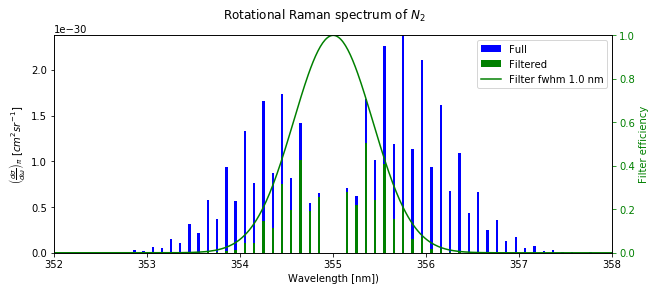

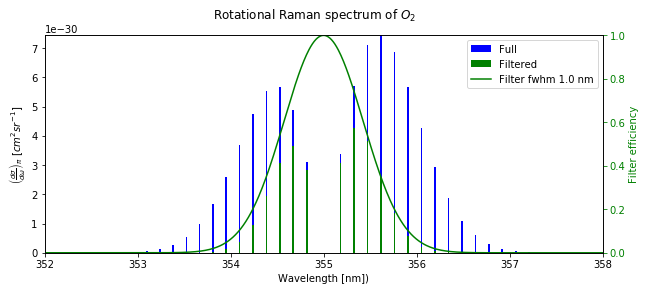

In [16]:
lidar = rayleigh_depol.DepolarizationLidar(355., 1.0)
lidar.plot_spectrum(240, rayleigh_depol.N2_parameters, xlim=(352, 358), figsize=(10, 4))
lidar.plot_spectrum(240, rayleigh_depol.O2_parameters, xlim=(352, 358), figsize=(10, 4))

In [17]:
0.780 / (0.780 + 0.212)
#0.212 / (0.780 + 0.212)

0.7862903225806452